<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Plots from X-ray absorption calculations using ORCA</h1>
<p>Presentation of the feature engineering applied for ORCA outputs</p>
<p>Data presented here, as new inputs for this jupyter-notebook, comes from the written-shell pipeline created to extract X-ray excited-state features from some specific pair of atoms group (e.g. pair amino acid).</p>
<p>Outputs here are filtered features that account for specific transitions (coreMO -> virtualMO) for the specific pair of atoms group.</p>
</body>
</html>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import csv as csv
from matplotlib.pyplot import figure
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

____________________________

In [76]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [77]:
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 18

--------------

<html>

<head>
<meta charset="UTF-8">
<title>Title of the document</title>
</head>

<body>
<h1 id="title">Löwdin Population analysis from </h1>
<h2 id="title"> X-ray absorption spectra calculated using PNO-DFT/ROCIS zora </h2>
<h3 id="title">    System of study: F ${---}$Y</h3>
<h4 id="title">   non-covalent interaction distances varying from 2,5 to 11,0 $\dot{A}$ </h4>
</body>
</html>


#### Loading matrices (data from the pipeline's outputs)
Data in .csv format
##### residue called as A is acting as one at the ground state amino acid
> ##### resA core MO
##### residue called as B is acting as one at the virtual state amino acid
> ##### resB virtual MO

In a pair-aa interaction, e.g. Phe-Tyr, Phenylalanine stands for resA core MO and Tyrosine for resB virtual MO. And after, Tyrosine stands for resA core MO and Phenylalanine for resB virtual MO. Both are calculated and are within the spectra.

> ##### resA core MO - Phenylalanine

In [78]:
#Uncomment the original range to see more peaks outside the expected range
resa_phe="resA_MOcore_chainFY_"
resa_tyr="resA_MOcore_chainYF_"
post=".csv"
list_suf = [10, 30, 50, 70, 90]
for ii in list_suf:
    globals()['resa_mocore_%s_FY_raw' % str(ii)] = pd.read_csv(resa_phe+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resa_mocore_%s_YF_raw' % str(ii)] = pd.read_csv(resa_tyr+str(ii)+post, delimiter=',', index_col='num-1')

resa_mocore_10_FY_raw#.head()

,sym,lvl,26,27,28,29,30,31,32,33,...,54,55,56,57,58,59,60,61,62,63
num-1,,,,,,,,,,,,,,,,,,,,,
65,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,C,s,0.0,0.0,0.0,0.0,0.0,0.0,99.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.2,0.0,95.1,0.2,0.0,0.0
71,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.1,0.0,0.0,0.0,2.1,96.3,0.0
72,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,95.5,1.5,0.0,0.0,1.1,1.5,0.0
73,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.8,1.2,0.0,0.5,94.4,1.7,0.0
74,C,s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.2,92.6,0.0,3.9,1.9,0.0,0.0


> ##### resB virt MO - Tyrosine

In [79]:
resb_tyr="resB_MOcore_chainFY_"
resb_phe="resB_MOcore_chainYF_"
post=".csv"
for ii in list_suf:
    globals()['resb_movirt_%s_FY_raw' % str(ii)] = pd.read_csv(resb_tyr+str(ii)+post, delimiter=',', index_col='num-1')
    globals()['resb_movirt_%s_YF_raw' % str(ii)] = pd.read_csv(resb_phe+str(ii)+post, delimiter=',', index_col='num-1')

resb_movirt_10_YF_raw#.head()

,sym,lvl,237,238,239,240,241,242,243,244,...,248,249,250,251,253,256,258,259,260,261
num-1,,,,,,,,,,,,,,,,,,,,,
64,atom,lvlMO,0.0,0.2,0.2,0.1,0.7,0.2,1.2,1.3,...,1.1,0.9,1.0,2.0,0.3,0.6,0.5,0.9,0.4,0.6
65,atom,lvlMO,0.5,1.2,1.2,0.3,0.2,0.1,0.5,1.1,...,0.3,0.4,0.1,0.2,0.7,0.0,0.0,0.0,0.1,0.8
66,atom,lvlMO,0.0,0.9,0.5,1.7,0.5,1.4,1.7,6.5,...,1.3,4.3,0.7,1.1,1.6,0.2,0.3,0.4,1.4,1.0
67,atom,lvlMO,0.0,0.4,0.2,0.7,0.2,0.7,0.7,2.9,...,0.8,2.0,0.4,0.4,0.4,0.0,0.1,0.1,0.8,0.3
68,atom,lvlMO,0.4,1.0,0.7,0.3,0.2,0.3,0.4,1.1,...,0.7,0.5,0.9,0.2,0.4,0.3,0.1,0.0,0.3,0.0
69,atom,lvlMO,5.3,9.5,11.3,0.2,0.4,0.3,0.5,0.0,...,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.1,0.0
70,atom,lvlMO,2.5,23.1,2.8,0.3,0.2,0.2,0.0,0.0,...,0.4,0.2,0.3,0.1,0.4,0.0,0.0,0.1,0.2,0.5
71,atom,lvlMO,1.2,3.4,22.9,0.3,0.0,1.1,0.4,0.3,...,0.7,0.1,1.1,0.0,0.1,0.0,0.0,0.0,0.3,0.1
72,atom,lvlMO,2.4,21.6,3.2,0.7,0.3,0.9,0.2,0.2,...,0.4,0.1,0.6,0.0,0.1,0.1,0.0,0.0,1.4,0.9


<html>


<body>
<h1 id="title">Features from  X-ray excited-state properties: </h1>
<h2 id="title">1. The number of transitions </h2>
<h2 id="title">2. The transitions averaged probability </h2>
<h2 id="title">3. The oscillator strength using electronic dipole moment as operator </h2>
<h2 id="title">4. The oscillator strength using velocity dipole moment as operator </h2>
</body>
</html>

#### coreMO vs. virtual MO (core/virt MO)
#### resA(Phe) --> resB(Tyr)

> ### 1. core/virt MO as function of the number of transitions

In [80]:
resab_fy="corevirtMO_matrix_chainFY_"#same as YF
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_10_FY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0,0,0,0,0,0,0,0,0,2,...,9,8,9,4,6,3,6,5,6,7
238,0,0,0,0,0,0,0,0,0,1,...,10,10,10,10,6,4,4,9,11,7
239,0,0,0,0,0,0,0,0,0,2,...,10,13,14,8,8,4,4,10,9,7
240,0,0,0,0,0,0,0,0,0,2,...,7,10,6,6,6,6,11,4,8,4
241,0,0,0,0,0,0,0,0,0,2,...,9,8,8,12,6,5,7,8,7,7


> ### 2. core/virt MO as function of the number of transitions averaged probability

In [81]:
resab_ts_fy="corevirtMO_matrix_tspb_chainFY_"#same as YF
post=".csv"
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)] = pd.read_csv(resab_ts_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirtMO_matrix_tspb_10_FY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011506,...,0.183038,0.345150,0.230469,0.420482,0.342889,0.292309,0.340653,0.402047,0.231908,0.299320
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011400,...,0.209906,0.188733,0.185493,0.258123,0.099042,0.421561,0.444072,0.230946,0.200330,0.396176
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028702,...,0.225289,0.124104,0.134278,0.297560,0.122195,0.416393,0.413328,0.187463,0.176542,0.311804
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509973,...,0.312420,0.287083,0.279507,0.463628,0.293293,0.314978,0.196169,0.343831,0.418202,0.401616
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.394419,...,0.280046,0.286962,0.208098,0.389352,0.530352,0.270859,0.342418,0.494221,0.334744,0.308385


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [82]:
resab_fosce_fy="corevirt_fosce_chainFY_"#same as YF
resab_foscwe_fy="corevirt_foscwe_chainFY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)] = pd.read_csv(resab_fosce_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwe_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_fosce_10_FY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000099,...,0.008925,0.001864,0.005292,0.000112,0.000317,0.022693,0.000371,0.001259,0.000255,0.029166
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000046,...,0.003146,0.009963,0.000440,0.000410,0.019185,0.002008,0.000134,0.006221,0.007042,0.001379
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000221,...,0.003118,0.012003,0.003398,0.000601,0.025722,0.001358,0.000175,0.007635,0.012188,0.002426
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004359,...,0.004314,0.008307,0.013344,0.027884,0.017237,0.008951,0.045482,0.033612,0.016522,0.000883
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003273,...,0.004456,0.029673,0.025949,0.003763,0.000436,0.021829,0.008188,0.006913,0.003862,0.010597


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

In [83]:
resab_foscv_fy="corevirt_foscv_chainFY_"#same as YF
resab_foscwv_fy="corevirt_foscwv_chainFY_"
post=".csv"
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscv_fy+str(ii)+post, delimiter=',', index_col='virt\core')
    globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)] = pd.read_csv(resab_foscwv_fy+str(ii)+post, delimiter=',', index_col='virt\core')

corevirt_mo_foscv_10_FY_raw.head()

,28,29,30,31,33,34,35,36,37,38,...,54,55,56,57,58,59,60,61,62,63
virt\core,,,,,,,,,,,,,,,,,,,,,
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000092,...,0.008284,0.001733,0.004922,0.000108,0.000301,0.021064,0.000362,0.001236,0.000249,0.026981
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000044,...,0.002948,0.009275,0.000413,0.000393,0.017852,0.001868,0.000131,0.005793,0.006552,0.001288
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000208,...,0.002927,0.011168,0.003163,0.000572,0.023935,0.001263,0.000172,0.007107,0.011330,0.002257
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004081,...,0.004011,0.007734,0.012461,0.026067,0.016020,0.008297,0.042338,0.031331,0.015358,0.000786
241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003069,...,0.004155,0.027589,0.024198,0.003562,0.000402,0.020288,0.007642,0.006461,0.003661,0.009778


### Main functions to present data according to the features

In [84]:
def selecting_atm_matrix(df, atoms_list):
    """
    it returns MO matrix (df) having just the atoms in atoms_list.
    """
    col_list = df.index.tolist() #listing index (elements from column 0)
    #dff = df.loc[:, (df != 0).any(axis=0)] #removing zero columns
    return df.loc[[i for i in atoms_list if i in col_list]] #returning just columns in the both lists intersection
#atoms_core=resa_mocore_GFG9Y_raw.index.tolist() #all C-core atoms
#[i for i in atoms_a if i in atoms_core] #atoms_a intersection atoms_core

In [85]:
def nonzero_mo_matrix(df):
    """
    it returns MO matrix (df) having just non-zero MO population.
    """
    return df.loc[:, (df != 0).any(axis=0)] #removing zero columns

In [86]:
def crop_by_loewdin_p(df,pop):
    """
    it returns MO matrix (df) having just a Loewdin MO population contribution greater than (100*pop)%.
    pop is a number between 0 and 1.
    """
    cols = [col for col, val in df.sum()[2:].iteritems() if val > (pop*100)]
    #iteritem() create a zip with the index_col and the values
    cols.insert(0,'lvl')
    cols.insert(0,'sym')
    #to add on the top the first two columns removed in the previous sum() evaluation
    return df[cols] #showing the fisrt two columns and those having population greater than pop*100%

In [87]:
def cropping_matrix(df, df1, df2):
    """
    it returns a cropped MO matrix from df using as parameters the indices in df1 and df2.
    df1 index are column names from df and df2 index are the rows from df
    """
    try:
        dff = df[df1.axes[1][2:].tolist()] #saving specific columns
    except KeyError:
        tmp_mo = [item for item in df1.axes[1][2:].tolist() if item in df.axes[1][2:].tolist()]
        #removing items in the first list that are not in the second one
        dff = df[tmp_mo]
    try:
        return dff.loc[[int(i) for i in df2.axes[1][2:].tolist()]] #returning specific rows
    except KeyError:
        tmp_mo2 = [item for item in df2.axes[1][2:].tolist() if item in dff.T.axes[1][2:].tolist()]
        # dff.T to obtain the index_col as the head row
        return dff.loc[[int(i) for i in tmp_mo2]] #returning specific rows
# the first two elements in df2.axes[1] and df1.axes[1] are "sym" and "lvl", that's why I used df.axes[1][2:]

<html>


<body>
<h3 id="title">Reducing Löwdin Population MO matrices by removing non-contributing MO</h3>
<h4> Case for core MO in the resA</h4>
</body>
</html>

In [88]:
for ii in list_suf:
    globals()['resa_mocore_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_FY_raw' % str(ii)])
    globals()['resa_mocore_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resa_mocore_%s_YF_raw' % str(ii)])

resa_mocore_10_FY.head()

,sym,lvl,32,40,52,53,57,58,60,61,62
num-1,,,,,,,,,,,
65,C,s,0.0,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,C,s,99.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,C,s,0.0,0.0,14.2,85.5,0.0,0.0,0.0,0.0,0.0
69,C,s,0.0,0.0,85.3,14.2,0.0,0.0,0.0,0.0,0.0
70,C,s,0.0,0.0,0.0,0.0,0.0,4.2,95.1,0.2,0.0


<html>

<body>
<h4> Case for virtual MO in the resB</h4>
</body>
</html>
<html>

In [89]:
for ii in list_suf:
    globals()['resb_movirt_%s_FY' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_FY_raw' % str(ii)])
    globals()['resb_movirt_%s_YF' % str(ii)] = nonzero_mo_matrix(globals()['resb_movirt_%s_YF_raw' % str(ii)])

resb_movirt_10_FY#.head()

,sym,lvl,237,238,239,240,241,242,243,244,...,248,249,250,251,252,253,256,259,260,262
num-1,,,,,,,,,,,,,,,,,,,,,
91,atom,lvlMO,0.0,0.1,0.2,1.2,0.0,1.9,0.3,0.2,...,0.9,0.6,0.7,1.4,0.9,1.8,0.0,0.1,2.2,1.7
92,atom,lvlMO,0.4,0.1,0.5,2.2,0.0,3.5,0.4,0.1,...,0.1,0.1,0.5,0.4,0.2,0.3,0.0,0.0,0.4,0.3
93,atom,lvlMO,2.2,0.4,0.6,5.1,0.0,18.9,3.7,1.2,...,0.3,1.7,0.7,2.6,0.7,1.5,0.0,0.2,4.8,0.5
94,atom,lvlMO,1.2,0.2,0.3,2.6,0.0,9.0,1.8,0.5,...,0.2,0.8,0.4,1.2,0.4,0.8,0.0,0.0,1.4,0.2
95,atom,lvlMO,0.5,0.1,0.1,0.9,0.0,3.5,0.7,0.2,...,0.6,1.1,1.9,1.7,0.8,1.4,0.0,0.0,0.6,0.2
96,atom,lvlMO,0.5,0.5,0.6,2.5,0.0,3.1,0.6,0.1,...,0.6,0.2,0.8,0.2,0.2,0.2,0.0,0.0,1.8,1.0
97,atom,lvlMO,1.0,0.8,0.2,15.2,1.6,5.9,0.0,0.2,...,0.1,0.5,2.0,0.4,0.0,0.1,0.0,0.0,0.5,0.1
98,atom,lvlMO,13.4,1.0,3.0,7.7,0.9,5.6,0.1,0.0,...,0.0,0.0,0.6,0.1,0.0,0.0,0.0,0.0,1.0,0.3
99,atom,lvlMO,18.8,4.1,1.8,3.6,0.2,0.7,0.1,0.1,...,0.5,0.3,1.8,0.1,0.1,0.2,0.0,0.0,2.2,0.1


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Reducing further resB Löwdin Population MO by just considering upper 67% population contribution</h4>
</body>
</html>

In [90]:
#for counting transitions in MO having greater than 67% of Loewdin population contribution in resB
pop = 0.30
for ii in list_suf:
    globals()['resb_movirt_%s_FY_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_FY_raw' % str(ii)],pop)
    globals()['resb_movirt_%s_YF_pop' % str(ii)] = crop_by_loewdin_p(globals()['resb_movirt_%s_YF_raw' % str(ii)],pop)

resb_movirt_90_FY_pop#.head()

,sym,lvl,237,238,241,245,249,250,252
num-1,,,,,,,,,
91,atom,lvlMO,0.0,2.3,1.3,3.0,0.4,2.8,3.2
92,atom,lvlMO,0.6,2.0,2.5,1.1,0.1,0.8,0.4
93,atom,lvlMO,2.3,5.5,12.4,6.2,0.6,3.3,0.6
94,atom,lvlMO,1.2,2.8,5.7,2.4,0.3,1.5,0.8
95,atom,lvlMO,0.5,1.0,2.3,5.1,0.3,2.7,2.4
96,atom,lvlMO,0.5,2.4,1.9,1.0,0.4,0.2,1.2
97,atom,lvlMO,1.5,8.3,6.1,0.6,0.5,1.5,0.9
98,atom,lvlMO,16.0,4.6,5.8,0.8,0.0,0.2,0.1
99,atom,lvlMO,24.9,1.8,0.5,0.1,0.6,1.0,0.9


In [91]:
#[int(i) for i in resb_movirt_G5FG5Y.axes[1][2:].tolist()]

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Cropping core virtual MO matrices by resA and resB matrices boundaries:</h3>
</body>
</html>

> ### 1st. feature: core/virt MO as function of the number of transitions

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [92]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['core_virt_mo_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

core_virt_mo_10_FY.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0,3,3,4,6,6,5,6
238,1,8,8,10,6,4,9,11
239,1,8,7,8,8,4,10,9
240,1,6,5,6,6,11,4,8
241,1,4,5,12,6,7,8,7


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [93]:
for ii in list_suf:
    globals()['core_virt_mo_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['core_virt_mo_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

core_virt_mo_10_FY_pop.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0,3,3,4,6,6,5,6
240,1,6,5,6,6,11,4,8
242,0,7,7,14,11,9,7,8
246,0,12,11,9,9,11,10,10
248,0,8,7,11,8,7,10,7


> ### 2nd. feature: core/virt MO as function of the number of transitions averaged probability

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [94]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

corevirtMO_matrix_tspb_10_FY.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.0000,0.457018,0.524011,0.420482,0.342889,0.340653,0.402047,0.231908
238,0.0285,0.065164,0.381975,0.258123,0.099042,0.444072,0.230946,0.200330
239,0.0363,0.095225,0.330614,0.297560,0.122195,0.413328,0.187463,0.176542
240,0.8015,0.311591,0.530046,0.463628,0.293293,0.196169,0.343831,0.418202
241,0.0715,0.466045,0.492248,0.389352,0.530352,0.342418,0.494221,0.334744


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [95]:
for ii in list_suf:
    globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirtMO_matrix_tspb_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])

corevirtMO_matrix_tspb_10_FY_pop.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.0000,0.457018,0.524011,0.420482,0.342889,0.340653,0.402047,0.231908
240,0.8015,0.311591,0.530046,0.463628,0.293293,0.196169,0.343831,0.418202
242,0.0000,0.314742,0.275036,0.178585,0.261199,0.558414,0.642420,0.276410
246,0.0000,0.127340,0.147180,0.252096,0.182438,0.182405,0.159490,0.165378
248,0.0000,0.385621,0.385201,0.224276,0.476873,0.546613,0.255318,0.384851


> ### 3. core/virt MO as function of the oscillator strength using electronic dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [96]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])

corevirt_mo_fosce_10_FY.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.000000,0.000195,0.000078,0.000112,0.000317,0.000371,0.001259,0.000255
238,0.000229,0.009750,0.002682,0.000410,0.019185,0.000134,0.006221,0.007042
239,0.000291,0.012143,0.002999,0.000601,0.025722,0.000175,0.007635,0.012188
240,0.006429,0.029631,0.010605,0.027884,0.017237,0.045482,0.033612,0.016522
241,0.000574,0.005976,0.001653,0.003763,0.000436,0.008188,0.006913,0.003862


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [97]:
for ii in list_suf:
    globals()['corevirt_mo_fosce_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_fosce_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_fosce_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwe_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwe_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])    

corevirt_mo_fosce_10_FY_pop.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.000000,0.000195,0.000078,0.000112,0.000317,0.000371,0.001259,0.000255
240,0.006429,0.029631,0.010605,0.027884,0.017237,0.045482,0.033612,0.016522
242,0.000000,0.001185,0.000986,0.001904,0.000298,0.002528,0.000253,0.001076
246,0.000000,0.000696,0.001365,0.000258,0.000301,0.000661,0.000451,0.001028
248,0.000000,0.000442,0.000844,0.000564,0.000207,0.000456,0.000322,0.000532


> ### 4. core/virt MO as function of the oscillator strength using velocity dipole moment as operator
> #### by weighted (WSM) sum and weighted average (WAM)

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB having just contributing MO</h4>
</body>
</html>

In [98]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF' % str(ii)])    

corevirt_mo_foscv_10_FY.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.000000,0.000186,0.000075,0.000108,0.000301,0.000362,0.001236,0.000249
238,0.000216,0.009106,0.002512,0.000393,0.017852,0.000131,0.005793,0.006552
239,0.000275,0.011339,0.002805,0.000572,0.023935,0.000172,0.007107,0.011330
240,0.006080,0.027657,0.009895,0.026067,0.016020,0.042338,0.031331,0.015358
241,0.000542,0.005578,0.001543,0.003562,0.000402,0.007642,0.006461,0.003661


<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">resA and resB, when resB has just upper a set percentage of MO contribution</h4>
</body>
</html>

In [99]:
for ii in list_suf:
    globals()['corevirt_mo_foscv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_FY_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_FY' % str(ii)], globals()['resb_movirt_%s_FY_pop' % str(ii)])
    globals()['corevirt_mo_foscwv_%s_YF_pop' % str(ii)] = cropping_matrix(globals()['corevirt_mo_foscwv_%s_FY_raw' % str(ii)], globals()['resa_mocore_%s_YF' % str(ii)], globals()['resb_movirt_%s_YF_pop' % str(ii)])    

corevirt_mo_foscv_10_FY_pop.head()

,40,52,53,57,58,60,61,62
virt\core,,,,,,,,
237,0.00000,0.000186,0.000075,0.000108,0.000301,0.000362,0.001236,0.000249
240,0.00608,0.027657,0.009895,0.026067,0.016020,0.042338,0.031331,0.015358
242,0.00000,0.001117,0.000930,0.001798,0.000280,0.002360,0.000243,0.001023
246,0.00000,0.000662,0.001306,0.000251,0.000279,0.000633,0.000435,0.000982
248,0.00000,0.000423,0.000815,0.000550,0.000194,0.000441,0.000316,0.000509


___________________________

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h3 id="title">Results</h3>
<h4 id="title">Features presentation</h4>
</body>
</html>

<html>

<head>
<meta charset="UTF-8">
</head>

<body>
<h4 id="title">Pair-aa distance in Å</h4>
</body>
</html>

> ##### 1st feature by a set percentage population

In [100]:
for ii in list_suf:
    ts_n_fy=globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum()
    ts_n_yf=globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} transitions number. F->Y: {ts_n_fy} Y->F: {ts_n_yf}; \
    F->Y: {(ts_n_fy*100)/(ts_n_fy+ts_n_yf):.2f} Y->F: {(ts_n_yf*100)/(ts_n_fy+ts_n_yf):.2f}")


Dist.: 1.0 transitions number. F->Y: 347 Y->F: 115;     F->Y: 75.11 Y->F: 24.89
Dist.: 3.0 transitions number. F->Y: 216 Y->F: 42;     F->Y: 83.72 Y->F: 16.28
Dist.: 5.0 transitions number. F->Y: 275 Y->F: 75;     F->Y: 78.57 Y->F: 21.43
Dist.: 7.0 transitions number. F->Y: 172 Y->F: 79;     F->Y: 68.53 Y->F: 31.47
Dist.: 9.0 transitions number. F->Y: 225 Y->F: 63;     F->Y: 78.12 Y->F: 21.88


##### 2nd feature by a set percentage population

In [101]:
for ii in list_suf:
    tspb_n_fy=globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum()
    tspb_n_yf=globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of WSM transition probability. F->Y: {tspb_n_fy:.2f} Y->F: {tspb_n_yf:.2f}; \
    F->Y: {(tspb_n_fy*100)/(tspb_n_fy+tspb_n_yf):.2f} Y->F: {(tspb_n_yf*100)/(tspb_n_fy+tspb_n_yf):.2f}")


Dist.: 1.0 sum of WSM transition probability. F->Y: 13.63 Y->F: 3.69;     F->Y: 78.70 Y->F: 21.30
Dist.: 3.0 sum of WSM transition probability. F->Y: 20.88 Y->F: 12.09;     F->Y: 63.32 Y->F: 36.68
Dist.: 5.0 sum of WSM transition probability. F->Y: 11.60 Y->F: 14.02;     F->Y: 45.27 Y->F: 54.73
Dist.: 7.0 sum of WSM transition probability. F->Y: 4.01 Y->F: 15.64;     F->Y: 20.40 Y->F: 79.60
Dist.: 9.0 sum of WSM transition probability. F->Y: 23.80 Y->F: 10.57;     F->Y: 69.24 Y->F: 30.76


> ##### 3rd feature

In [102]:
for ii in list_suf:
    fosce_fy=globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum()
    fosce_yf=globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WSM. F->Y: {fosce_fy:.2f} Y->F: {fosce_yf:.2f}; \
    F->Y: {(fosce_fy*100)/(fosce_fy+fosce_yf):.2f} Y->F: {(fosce_yf*100)/(fosce_fy+fosce_yf):.2f}")


Dist.: 1.0 sum of fosce by WSM. F->Y: 0.47 Y->F: 0.47;     F->Y: 49.59 Y->F: 50.41
Dist.: 3.0 sum of fosce by WSM. F->Y: 0.57 Y->F: 0.56;     F->Y: 50.65 Y->F: 49.35
Dist.: 5.0 sum of fosce by WSM. F->Y: 0.33 Y->F: 0.52;     F->Y: 38.86 Y->F: 61.14
Dist.: 7.0 sum of fosce by WSM. F->Y: 0.52 Y->F: 0.52;     F->Y: 49.73 Y->F: 50.27
Dist.: 9.0 sum of fosce by WSM. F->Y: 0.48 Y->F: 0.34;     F->Y: 58.62 Y->F: 41.38


In [103]:
for ii in list_suf:
    foscwe_fy=globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum()
    foscwe_yf=globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of fosce by WAM. F->Y: {foscwe_fy:.2f} Y->F: {foscwe_yf:.2f}; \
    F->Y: {(foscwe_fy*100)/(foscwe_fy+foscwe_yf):.2f} Y->F: {(foscwe_yf*100)/(foscwe_fy+foscwe_yf):.2f}")

Dist.: 1.0 sum of fosce by WAM. F->Y: 1.54 Y->F: 1.82;     F->Y: 45.75 Y->F: 54.25
Dist.: 3.0 sum of fosce by WAM. F->Y: 1.88 Y->F: 1.94;     F->Y: 49.28 Y->F: 50.72
Dist.: 5.0 sum of fosce by WAM. F->Y: 2.31 Y->F: 1.52;     F->Y: 60.30 Y->F: 39.70
Dist.: 7.0 sum of fosce by WAM. F->Y: 1.94 Y->F: 1.60;     F->Y: 54.76 Y->F: 45.24
Dist.: 9.0 sum of fosce by WAM. F->Y: 2.03 Y->F: 1.63;     F->Y: 55.52 Y->F: 44.48


> ##### 4th feature

In [104]:
for ii in list_suf:
    foscv_fy=globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum()
    foscv_yf=globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WSM. F->Y: {foscv_fy:.2f} Y->F: {foscv_yf:.2f}; \
    F->Y: {(foscv_fy*100)/(foscv_fy+foscv_yf):.2f} Y->F: {(foscv_yf*100)/(foscv_fy+foscv_yf):.2f}")


Dist.: 1.0 sum of foscv by WSM. F->Y: 0.43 Y->F: 0.44;     F->Y: 49.69 Y->F: 50.31
Dist.: 3.0 sum of foscv by WSM. F->Y: 0.53 Y->F: 0.52;     F->Y: 50.77 Y->F: 49.23
Dist.: 5.0 sum of foscv by WSM. F->Y: 0.31 Y->F: 0.48;     F->Y: 39.02 Y->F: 60.98
Dist.: 7.0 sum of foscv by WSM. F->Y: 0.48 Y->F: 0.49;     F->Y: 49.82 Y->F: 50.18
Dist.: 9.0 sum of foscv by WSM. F->Y: 0.45 Y->F: 0.32;     F->Y: 58.75 Y->F: 41.25


In [105]:
for ii in list_suf:
    foscwv_fy=globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum()
    foscwv_yf=globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum()
    print(f"Dist.: {ii/10} sum of foscv by WAM. F->Y: {foscwv_fy:.2f} Y->F: {foscwv_yf:.2f}; \
    F->Y: {(foscwv_fy*100)/(foscwv_fy+foscwv_yf):.2f} Y->F: {(foscwv_yf*100)/(foscwv_fy+foscwv_yf):.2f}")


Dist.: 1.0 sum of foscv by WAM. F->Y: 1.44 Y->F: 1.70;     F->Y: 45.84 Y->F: 54.16
Dist.: 3.0 sum of foscv by WAM. F->Y: 1.76 Y->F: 1.80;     F->Y: 49.47 Y->F: 50.53
Dist.: 5.0 sum of foscv by WAM. F->Y: 2.16 Y->F: 1.42;     F->Y: 60.44 Y->F: 39.56
Dist.: 7.0 sum of foscv by WAM. F->Y: 1.82 Y->F: 1.49;     F->Y: 54.88 Y->F: 45.12
Dist.: 9.0 sum of foscv by WAM. F->Y: 1.90 Y->F: 1.51;     F->Y: 55.75 Y->F: 44.25


______________________________

#### Plotting

In [106]:
AB_distances = [ii/10 for ii in list_suf]
ts_pop_sum = [globals()['core_virt_mo_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum = [globals()['corevirtMO_matrix_tspb_%s_FY_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum = [globals()['corevirt_mo_fosce_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum = [globals()['corevirt_mo_foscv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum = [globals()['corevirt_mo_foscwe_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum = [globals()['corevirt_mo_foscwv_%s_FY' % str(ii)].sum().sum() for ii in list_suf]
ts_pop_sum_2 = [globals()['core_virt_mo_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
tspb_pop_sum_2 = [globals()['corevirtMO_matrix_tspb_%s_YF_pop' % str(ii)].sum().sum() for ii in list_suf]
fosce_all_sum_2 = [globals()['corevirt_mo_fosce_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscv_all_sum_2 = [globals()['corevirt_mo_foscv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwe_all_sum_2 = [globals()['corevirt_mo_foscwe_%s_YF' % str(ii)].sum().sum() for ii in list_suf]
foscwv_all_sum_2 = [globals()['corevirt_mo_foscwv_%s_YF' % str(ii)].sum().sum() for ii in list_suf]

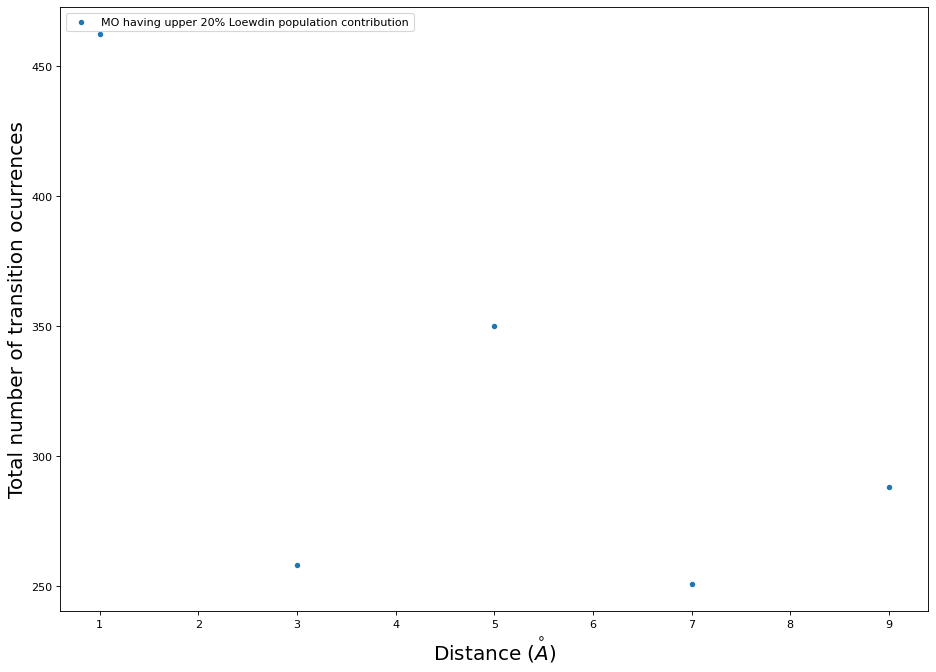

In [107]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(ts_pop_sum)+np.array(ts_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total number of transition ocurrences')
plt.legend(loc='upper left');
plt.show()

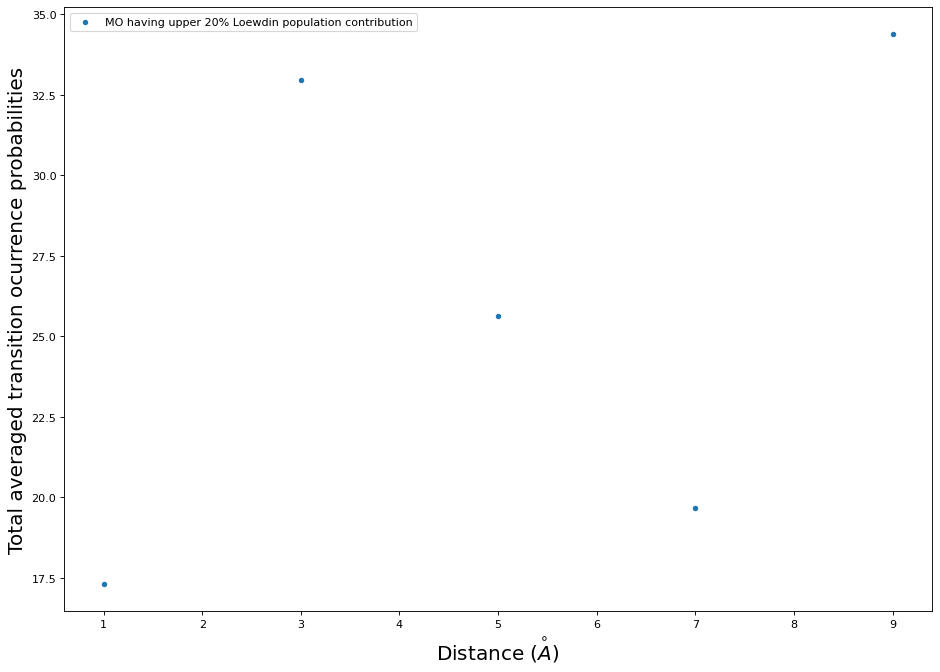

In [108]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(tspb_pop_sum)+np.array(tspb_pop_sum_2)), s=15, label='MO having upper 20% Loewdin population contribution')
#label='MO having upper 67% Loewdin population contribution'

plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Total averaged transition ocurrence probabilities')
plt.legend(loc='upper left');
plt.show()

#### by WSM

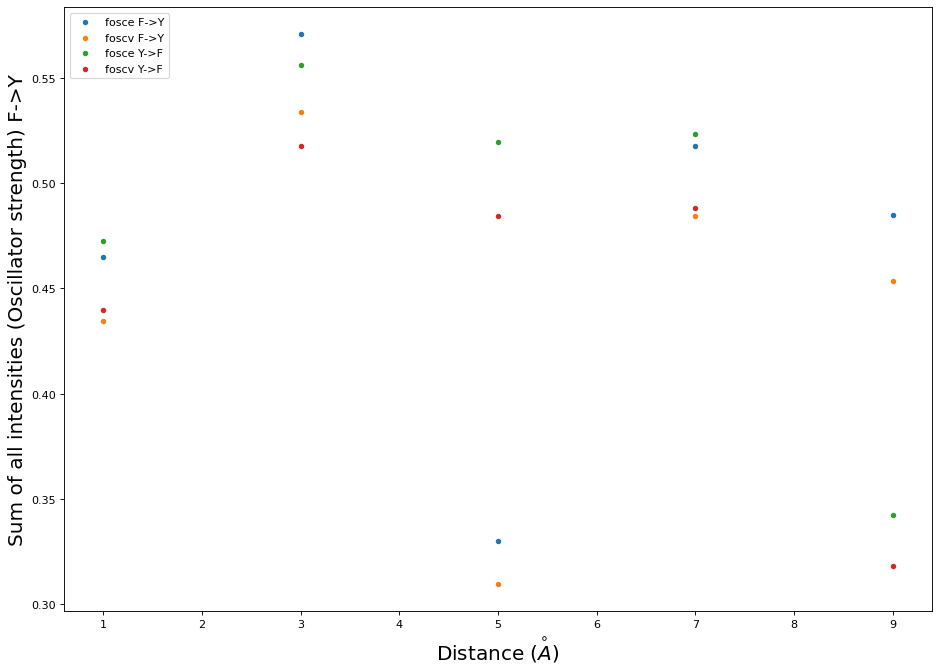

In [109]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, fosce_all_sum, s=15, label='fosce F->Y')
n1.scatter(AB_distances, foscv_all_sum, s=15, label='foscv F->Y')
n1.scatter(AB_distances, fosce_all_sum_2, s=15, label='fosce Y->F')
n1.scatter(AB_distances, foscv_all_sum_2, s=15, label='foscv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

In [110]:
np.array(fosce_all_sum)+np.array(fosce_all_sum_2)

array([0.93772383, 1.12634658, 0.84948811, 1.04099524, 0.82732117])

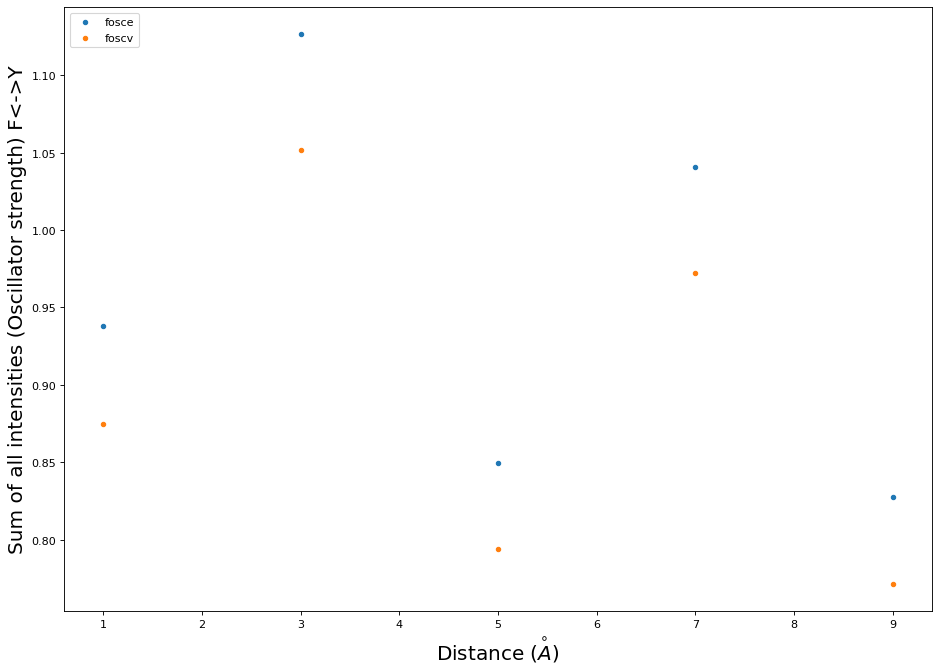

In [111]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(fosce_all_sum)+np.array(fosce_all_sum_2)), s=15, label='fosce')
n1.scatter(AB_distances, (np.array(foscv_all_sum)+np.array(foscv_all_sum_2)), s=15, label='foscv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

#### by WAM

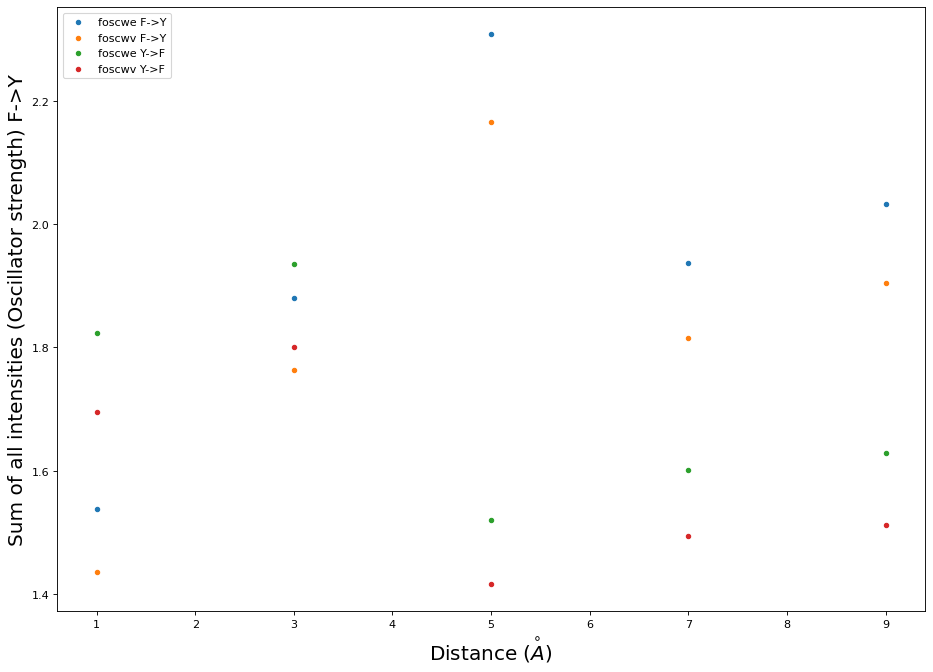

In [112]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, foscwe_all_sum, s=15, label='foscwe F->Y')
n1.scatter(AB_distances, foscwv_all_sum, s=15, label='foscwv F->Y')
n1.scatter(AB_distances, foscwe_all_sum_2, s=15, label='foscwe Y->F')
n1.scatter(AB_distances, foscwv_all_sum_2, s=15, label='foscwv Y->F')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F->Y')
plt.legend(loc='upper left');
plt.show()

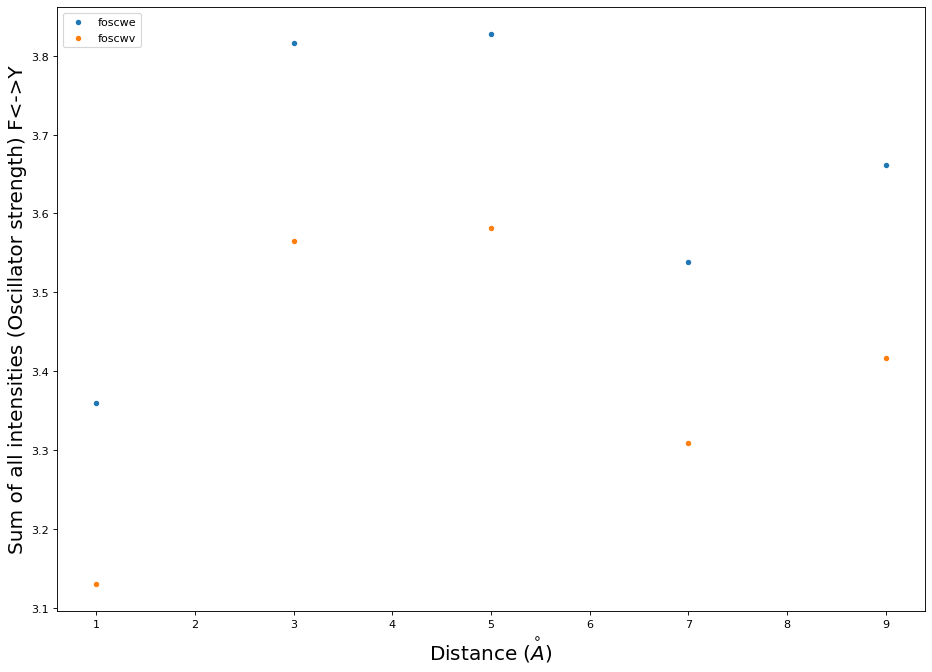

In [113]:
fig = plt.figure(figsize=(14, 10), dpi=80)
n1 = fig.add_subplot(111)

#for ii in list_suf:
n1.scatter(AB_distances, (np.array(foscwe_all_sum)+np.array(foscwe_all_sum_2)), s=15, label='foscwe')
n1.scatter(AB_distances, (np.array(foscwv_all_sum)+np.array(foscwv_all_sum_2)), s=15, label='foscwv')

#label=str(ii/10)+'$\overset{\circ}{A}$'
plt.xlabel('Distance ($\overset{\circ}{A}$)')
plt.ylabel('Sum of all intensities (Oscillator strength) F<->Y')
plt.legend(loc='upper left');
plt.show()

##### dx,dy and dz correspond to the x-, y- and z-components of the transition moment (d)

### G$_{2}$YG$_{n}$FG$_ {11-n}$ ( $n=0..9$ )
#### optimized at PM7 and DFTB3-D3H4
#### by similarity

In [114]:
#Uncomment the original range to see more peaks outside the expected range
file=""
post="_opt_gms.csv"
g2ypg11 = pd.read_csv(file+'G2YPG11'+post, delimiter=',')
g2ygpg10 = pd.read_csv(file+'G2YGPG10'+post, delimiter=',')
g2yg2pg9 = pd.read_csv(file+'G2YG2PG9'+post, delimiter=',')
g2yg3pg8 = pd.read_csv(file+'G2YG3PG8'+post, delimiter=',')
g2yg4pg7 = pd.read_csv(file+'G2YG4PG7'+post, delimiter=',')
g2yg5pg6 = pd.read_csv(file+'G2YG5PG6'+post, delimiter=',')
g2yg6pg5 = pd.read_csv(file+'G2YG6PG5'+post, delimiter=',')
g2yg7pg4 = pd.read_csv(file+'G2YG7PG4'+post, delimiter=',')
g2yg8pg3 = pd.read_csv(file+'G2YG8PG3'+post, delimiter=',')
g2yg9pg2 = pd.read_csv(file+'G2YG9PG2'+post, delimiter=',')
g2yg12 = pd.read_csv(file+'G2YG12'+post, delimiter=',')
g4pg10 = pd.read_csv(file+'G4PG10'+post, delimiter=',')

g2ypg11.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2ygpg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg2pg9.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg3pg8.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg4pg7.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg5pg6.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg6pg5.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg7pg4.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg8pg3.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg9pg2.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g2yg12.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']
g4pg10.columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

g2yg9pg2

FileNotFoundError: [Errno 2] No such file or directory: 'G2YPG11_opt_gms.csv'

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
#n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
#n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
#n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']],g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']],g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']],g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
#n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']],g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']],g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()

In [ ]:
#add yft and yfc to see a broader energy range
fig = plt.figure(figsize=(14, 10), dpi=80)
n2 = fig.add_subplot(111)
#n2.scatter(g2ypg11[['Energy']],g2ypg11[['Intensity']], s=5, label='G2YPG11')
#n2.scatter(g2ygpg10[['Energy']]-0.05,g2ygpg10[['Intensity']], s=5, label='G2YGPG10')
#n2.scatter(g2yg2pg9[['Energy']]-0.13,g2yg2pg9[['Intensity']], s=5, label='G2YG2PG9')
#n2.scatter(g2yg3pg8[['Energy']]-0.21,g2yg3pg8[['Intensity']], s=5, label='G2YG3PG8')
n2.scatter(g2yg4pg7[['Energy']],g2yg4pg7[['Intensity']], s=5, label='G2YG4PG7')
n2.scatter(g2yg5pg6[['Energy']],g2yg5pg6[['Intensity']], s=5, label='G2YG5PG6')
n2.scatter(g2yg6pg5[['Energy']],g2yg6pg5[['Intensity']], s=5, label='G2YG6PG5')
n2.scatter(g2yg7pg4[['Energy']],g2yg7pg4[['Intensity']], s=5, label='G2YG7PG4')
#n2.scatter(g2yg8pg3[['Energy']]-0.4,g2yg8pg3[['Intensity']], s=5, label='G2YG8PG3')
#n2.scatter(g2yg9pg2[['Energy']]-0.25,g2yg9pg2[['Intensity']], s=5, label='G2YG9PG2')
n2.scatter(g2yg12[['Energy']],g2yg12[['Intensity']], s=5, label='G2YG12')
n2.scatter(g4pg10[['Energy']],g4pg10[['Intensity']], s=5, label='G4PG10')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (Oscillator strength)')
plt.legend(loc='upper left');
plt.show()